In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_flight_data.csv')

In [3]:
df.head()

,airline,flight_number,duration_min,stops,price_INR,day_of_week,is_weekend,days_before_departure,source,destination,departure_chunk,arrival_chunk,stops_chunk,min_price_flight,min_price_group,flight_number_clean
0,6E,['6E-522'],70,0,7638.20,Monday,False,33,AMD,BLR,Afternoon,Afternoon,0,7638.20,7638.20,6E-522
1,6E,['6E-699'],75,0,7638.20,Monday,False,33,AMD,BLR,Mid-Night,Early Morning,0,7638.20,7638.20,6E-699
2,6E,['6E-794'],75,0,8115.16,Monday,False,33,AMD,BLR,Night,Night,0,8115.16,8115.16,6E-794
3,6E,['6E-7725'],80,0,10022.99,Thursday,False,43,AMD,BLR,Afternoon,Evening,0,10022.99,10022.99,6E-7725
4,6E,['6E-5273'],80,0,17932.63,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,17932.63,6E-5273


In [4]:
df = df.drop(columns=['flight_number','flight_number_clean','stops'])

In [5]:
df.head(50)

,airline,duration_min,price_INR,day_of_week,is_weekend,days_before_departure,source,destination,departure_chunk,arrival_chunk,stops_chunk,min_price_flight,min_price_group
0,6E,70,7638.20,Monday,False,33,AMD,BLR,Afternoon,Afternoon,0,7638.20,7638.20
1,6E,75,7638.20,Monday,False,33,AMD,BLR,Mid-Night,Early Morning,0,7638.20,7638.20
2,6E,75,8115.16,Monday,False,33,AMD,BLR,Night,Night,0,8115.16,8115.16
3,6E,80,10022.99,Thursday,False,43,AMD,BLR,Afternoon,Evening,0,10022.99,10022.99
4,6E,80,17932.63,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,17932.63
5,6E,80,18269.16,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,17932.63
6,6E,80,16250.86,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,16250.86
7,6E,80,17260.44,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,16250.86
8,6E,80,18830.04,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,16250.86
9,6E,80,17707.43,Saturday,True,3,AMD,BLR,Night,Night,0,5153.21,16250.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296037 entries, 0 to 296036
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   airline                296037 non-null  object 
 1   duration_min           296037 non-null  int64  
 2   price_INR              296037 non-null  float64
 3   day_of_week            296037 non-null  object 
 4   is_weekend             296037 non-null  bool   
 5   days_before_departure  296037 non-null  int64  
 6   source                 296037 non-null  object 
 7   destination            296037 non-null  object 
 8   departure_chunk        296037 non-null  object 
 9   arrival_chunk          296037 non-null  object 
 10  stops_chunk            296037 non-null  object 
 11  min_price_flight       296037 non-null  float64
 12  min_price_group        296037 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 27.4+ MB


In [7]:
## For saving storage and memory converting float to int for duration and others form 64 bit int to as much needed
df['duration_min'] = df['duration_min'].round().astype('int32')  # or 'int32'
df['days_before_departure'] = pd.to_numeric(df['days_before_departure'], downcast='integer')
df['price_INR'] = pd.to_numeric(df['price_INR'], downcast='integer')
df['min_price_flight'] = pd.to_numeric(df['min_price_flight'], downcast='integer')
df['min_price_group'] = pd.to_numeric(df['min_price_group'], downcast='integer')

categorical_cols = ['airline', 'source', 'departure_chunk',
                    'stops_chunk', 'arrival_chunk', 'destination','is_weekend','day_of_week']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296037 entries, 0 to 296036
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   airline                296037 non-null  category
 1   duration_min           296037 non-null  int32   
 2   price_INR              296037 non-null  float64 
 3   day_of_week            296037 non-null  category
 4   is_weekend             296037 non-null  category
 5   days_before_departure  296037 non-null  int8    
 6   source                 296037 non-null  category
 7   destination            296037 non-null  category
 8   departure_chunk        296037 non-null  category
 9   arrival_chunk          296037 non-null  category
 10  stops_chunk            296037 non-null  category
 11  min_price_flight       296037 non-null  float64 
 12  min_price_group        296037 non-null  float64 
dtypes: category(8), float64(3), int32(1), int8(1)
memory usage: 10.4 MB


In [9]:
df = df.drop(columns=['min_price_group','price_INR','is_weekend'])

In [10]:
df.head()

,airline,duration_min,day_of_week,days_before_departure,source,destination,departure_chunk,arrival_chunk,stops_chunk,min_price_flight
0,6E,70,Monday,33,AMD,BLR,Afternoon,Afternoon,0,7638.20
1,6E,75,Monday,33,AMD,BLR,Mid-Night,Early Morning,0,7638.20
2,6E,75,Monday,33,AMD,BLR,Night,Night,0,8115.16
3,6E,80,Thursday,43,AMD,BLR,Afternoon,Evening,0,10022.99
4,6E,80,Saturday,3,AMD,BLR,Night,Night,0,5153.21


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --------------------------
# 🧠 Define Feature Columns
# --------------------------
categorical_ordinal = {
    'stops_chunk': [['0', '1', '2_or_more']]
    # 'is_weekend': [['False', 'True']]
}

categorical_onehot = ['airline', 'source', 'departure_chunk', 'arrival_chunk', 'destination', 'day_of_week']

numeric_features = [
    'duration_min', 'days_before_departure'
    # Add any other numeric features you want
]

target = 'min_price_flight'

# --------------------------
# 🛠️ Preprocessor
# --------------------------
preprocessor = ColumnTransformer(transformers=[
    ('ord1', OrdinalEncoder(categories=categorical_ordinal['stops_chunk']), ['stops_chunk']),
    # ('ord2', OrdinalEncoder(categories=categorical_ordinal['is_weekend']), ['is_weekend']),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), categorical_onehot)
], remainder='passthrough')  # numeric columns are passed through as-is

# --------------------------
# 🎯 Model Pipeline
# --------------------------
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# --------------------------
# 🧪 Train/Test Split
# --------------------------
X = df[categorical_onehot + list(categorical_ordinal.keys()) + numeric_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------
# 🚀 Train the Model
# --------------------------
pipeline.fit(X_train, y_train)

# --------------------------
# 📊 Evaluate
# --------------------------
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Random Forest Results:\nRMSE: {rmse:.2f}\nR2 Score: {r2:.4f}")


✅ Random Forest Results:
RMSE: 1235.91
R2 Score: 0.9547


In [12]:
import pandas as pd

custom_input = pd.DataFrame([{
    'airline': 'AI',
    'source': 'HYD',
    'departure_chunk': 'Morning',
    'arrival_chunk': 'Afternoon',
    'destination': 'DEL',
    'day_of_week': 'Monday',
    'stops_chunk': '0',
    'duration_min': 120,
    'days_before_departure': 5
}])

# Predict using the trained pipeline
predicted_price = pipeline.predict(custom_input)
print(f"🛫 Predicted Minimum Flight Price: ₹{predicted_price[0]:.2f}")


🛫 Predicted Minimum Flight Price: ₹3894.85


C:\Users\PARTH\AppData\Local\Temp\ipykernel_28412\3654044000.py:31: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from current font.
  plt.tight_layout()
C:\Users\PARTH\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128747 (\N{AIRPLANE DEPARTURE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


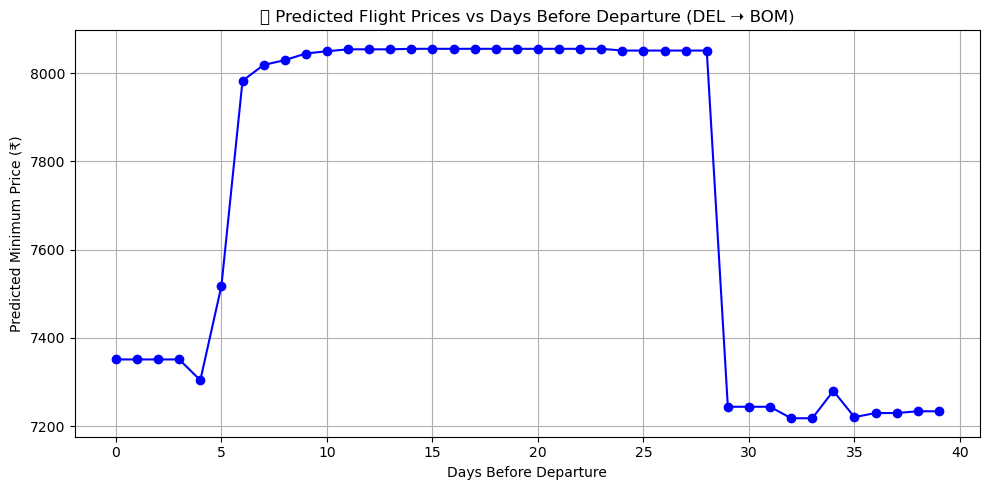

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Fixed flight input features
base_input = {
    'airline': '6E',
    'source': 'HYD',
    'departure_chunk': 'Morning',
    'arrival_chunk': 'Afternoon',
    'destination': 'DEL',
    'day_of_week': 'Monday',
    'stops_chunk': '0',
    'duration_min': 120
}

# Create DataFrame for 40 days
inputs = pd.DataFrame([
    {**base_input, 'days_before_departure': day} for day in range(0, 40)
])

# Predict prices
predicted_prices = pipeline.predict(inputs)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(0, 40), predicted_prices, marker='o', linestyle='-', color='blue')
plt.title('🛫 Predicted Flight Prices vs Days Before Departure (DEL ➝ BOM)')
plt.xlabel('Days Before Departure')
plt.ylabel('Predicted Minimum Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import pickle
pickle.dump(pipeline, open('pipeline.pkl', 'wb'))